### 1- import libraries and read data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Online_Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2- data cleaning and preprocessing

In [5]:
print (df.info)
print("--------------------------------------------------")
print (df.shape)
print("--------------------------------------------------")
print (df.isnull().sum())

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [6]:
df= df.dropna()
print(df.info())
print("--------------------------------------------------")
print(df.shape) 

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None
--------------------------------------------------
(406829, 8)


In [7]:
# R (Recency): Number of days since last purchase
# F (Frequency): Number of tracsactions
# M (Monetary): Total amount of transactions

In [8]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_df_m = df.groupby('CustomerID')['Amount'].sum()
rfm_df_m.reset_index()
rfm_df_m.columns = ['CustomerID', 'Amount']
print(rfm_df_m)

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64


In [9]:
rfm_df_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_df_f = rfm_df_f.reset_index()
rfm_df_f.columns = ['CustomerID', 'Frequency']
print(rfm_df_f)

     CustomerID  Frequency
0       12346.0          2
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4367    18280.0         10
4368    18281.0          7
4369    18282.0         13
4370    18283.0        756
4371    18287.0         70

[4372 rows x 2 columns]


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(df['InvoiceDate'])
df['Diff'] = max_date - df['InvoiceDate']
rfm_df_p = df.groupby('CustomerID')['Diff'].min()
rfm_df_p = rfm_df_p.reset_index()
rfm_df_p.columns = ['CustomerID','Diff']
rfm_df_p['Diff'] = rfm_df_p['Diff'].dt.days
print(rfm_df_p)

     CustomerID  Diff
0       12346.0   325
1       12347.0     1
2       12348.0    74
3       12349.0    18
4       12350.0   309
...         ...   ...
4367    18280.0   277
4368    18281.0   180
4369    18282.0     7
4370    18283.0     3
4371    18287.0    42

[4372 rows x 2 columns]


In [11]:
df_final = pd.merge(rfm_df_m,rfm_df_f,on='CustomerID',how='inner')
df_final = pd.merge(df_final,rfm_df_p,on='CustomerID',how='inner')
df_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df_final

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


### 3- data visualization

In [12]:
# sns.pairplot(df)

### 4- scalling data

In [13]:
x= df_final[['Amount', 'Frequency', 'Recency']]
y=df_final["CustomerID"]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
df_scaled = scl.fit_transform(x)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Amount', 'Frequency', 'Recency']
df_scaled

,Amount,Frequency,Recency
0,0.015109,0.000125,0.871314
1,0.030297,0.022676,0.002681
2,0.021442,0.003758,0.198391
3,0.021303,0.009020,0.048257
4,0.016288,0.002005,0.828418
...,...,...,...
4367,0.015746,0.001128,0.742627
4368,0.015394,0.000752,0.482574
4369,0.015731,0.001503,0.018767
4370,0.022491,0.094588,0.008043


### 4- apply PCA

In [15]:
from sklearn.decomposition import PCA
dim_red=PCA()
x_pca=dim_red.fit_transform(df_scaled)
print (dim_red.explained_variance_ratio_)

[0.97809762 0.01568386 0.00621853]


In [16]:
dim_red=PCA(n_components=2)
x_pca=dim_red.fit_transform(df_scaled)
print (dim_red.explained_variance_ratio_)
df_final=pd.DataFrame(x_pca,columns=dim_red.get_feature_names_out())
df_final

[0.97809762 0.01568386]


,pca0,pca1
0,0.627348,0.003636
1,-0.241701,0.007555
2,-0.045505,-0.006895
3,-0.195702,-0.007234
4,0.584409,0.004671
...,...,...
4367,0.498676,0.001428
4368,0.238730,-0.005885
4369,-0.224932,-0.017243
4370,-0.237856,0.052499


### 5- create model

C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 324.3418016814512
2 70.76203026960225
3 36.156816444470934
4 22.686619969415432
5 15.938017170449342
6 12.588328050281682
7 9.281122388025192


C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

8 7.3934517026486715
9 6.017424487756339


C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


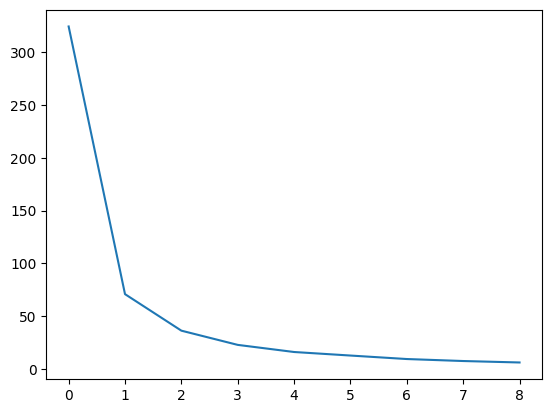

In [17]:
from sklearn.cluster import KMeans
### elbow
list_of_inirtias=[]
for n in range(1,10):
    kmeans=KMeans(n_clusters=n)
    predictions=kmeans.fit_predict(df_final)
    list_of_inirtias.append(kmeans.inertia_)
    print (n,kmeans.inertia_)
plt.plot(list_of_inirtias)

In [18]:
# kmeans =3 is the best
kmeans=KMeans(n_clusters=3)
predictions=kmeans.fit_predict(df_final)

C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
original_data_before_pca= dim_red.inverse_transform(df_final)
original_data_before_scalled=scl.inverse_transform(original_data_before_pca)
df_final=pd.DataFrame(original_data_before_scalled)
df_final.columns=['Amount', 'Frequency', 'Recency']
df_final['ClusterID']=predictions
df_final['CustomerID']=y

In [20]:
df_final

,Amount,Frequency,Recency,ClusterID,CustomerID
0,67.256575,0.074360,324.999238,1,12346.0
1,4416.592551,178.948123,0.998793,0,12347.0
2,689.223440,62.723894,74.012548,0,12348.0
3,1235.196476,87.955632,18.005916,0,12349.0
4,452.509542,13.618377,308.998662,1,12350.0
...,...,...,...,...,...
4367,146.818421,10.967209,277.000383,1,18280.0
4368,-269.543511,17.031344,180.003968,2,18281.0
4369,-671.097065,37.270623,7.009600,0,18282.0
4370,13497.250788,429.535924,2.870868,0,18283.0


## Profiling clusters

In [32]:
# cluster0
mean_amount_of_cluster0=df_final.loc[df_final["ClusterID"]==0,'Amount'].mean()
print ("the mean amount of cluster0 =",mean_amount_of_cluster0)
mean_freaquency_of_cluster0=df_final.loc[df_final["ClusterID"]==0,'Frequency'].mean()
print ("the mean frequency of cluster0 =",mean_freaquency_of_cluster0)
mean_recency_of_cluster0=df_final.loc[df_final["ClusterID"]==0,'Recency'].mean()
print ("the mean recency of cluster0 =",mean_recency_of_cluster0)
print ("--------------------------------------------------------------")

# cluster1
mean_amount_of_cluster1=df_final.loc[df_final["ClusterID"]==1,'Amount'].mean()
print ("the mean amount of cluster1 =",mean_amount_of_cluster1)
mean_freaquency_of_cluster1=df_final.loc[df_final["ClusterID"]==1,'Frequency'].mean()
print ("the mean frequency of cluster1 =",mean_freaquency_of_cluster1)
mean_recency_of_cluster1=df_final.loc[df_final["ClusterID"]==1,'Recency'].mean()
print ("the mean recency of cluster1 =",mean_recency_of_cluster1)
print ("--------------------------------------------------------------")

# cluster2
mean_amount_of_cluster2=df_final.loc[df_final["ClusterID"]==2,'Amount'].mean()
print ("the mean amount of cluster2 =",mean_amount_of_cluster2)
mean_freaquency_of_cluster2=df_final.loc[df_final["ClusterID"]==2,'Frequency'].mean()
print ("the mean frequency of cluster2 =",mean_freaquency_of_cluster2)
mean_recency_of_cluster2=df_final.loc[df_final["ClusterID"]==2,'Recency'].mean()
print ("the mean recency of cluster2 =",mean_recency_of_cluster2)

the mean amount of cluster0 = 2564.2506205728005
the mean frequency of cluster0 = 122.50187456232254
the mean recency of cluster0 = 30.039255955433447
--------------------------------------------------------------
the mean amount of cluster1 = 555.0812573865843
the mean frequency of cluster1 = 19.10242841690641
the mean recency of cluster1 = 294.3705389819574
--------------------------------------------------------------
the mean amount of cluster2 = 558.0931170382146
the mean frequency of cluster2 = 45.058312392861374
the mean recency of cluster2 = 151.53477007801774


## visualization

C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

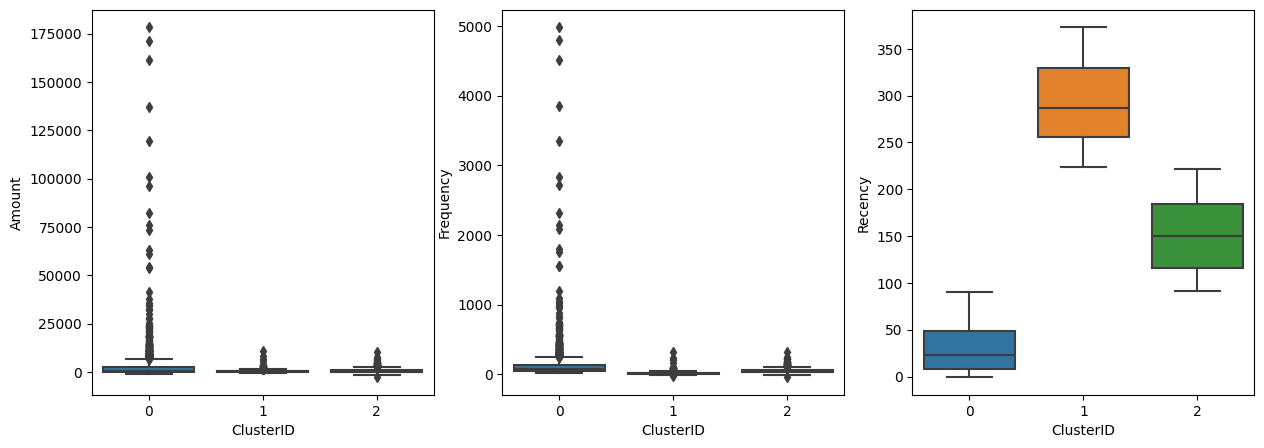

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(ax=axes[0], x='ClusterID', y='Amount', data=df_final)
sns.boxplot(ax=axes[1], x='ClusterID', y='Frequency', data=df_final)
sns.boxplot(ax=axes[2], x='ClusterID', y='Recency', data=df_final)
plt.show()

## Evaluate the model

In [61]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_final, kmeans.labels_)
print(f"The silhouette score is: {silhouette_avg}")

The silhouette score is: -0.21676520851287642


### Personalization and Recommendations

In [ ]:
the mean amount of cluster0 = 2564.2506205728005
the mean frequency of cluster0 = 122.50187456232254
the mean recency of cluster0 = 30.039255955433447
--------------------------------------------------------------
the mean amount of cluster1 = 555.0812573865843
the mean frequency of cluster1 = 19.10242841690641
the mean recency of cluster1 = 294.3705389819574
--------------------------------------------------------------
the mean amount of cluster2 = 558.0931170382146
the mean frequency of cluster2 = 45.058312392861374
the mean recency of cluster2 = 151.53477007801774

###### from my analysis :
###### I found cluster0 is buy in large quantities or large sums of money,  their number of tracsactions is very high in short time, therefore, this group of people are good, so I must not lose them.

######  I found cluster1 buy in  low quantities or low sums of money, their number of tracsactions is low in long time therefore, this group of people are bad, therefore I must set up large advertising campaigns to target them.

###### I found cluster2 buy in  mid quantities or mid  sums of money, their number of tracsactions is in mid range in mid range time, this group of people are not good but not bad, therefore I must set up  advertising campaigns to target them.